 Prepare a classification model using SVM for salary data 



In [ ]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score



In [ ]:
from google.colab  import files
uploaded = files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv
Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [ ]:
import pandas as pd
import io
  
sal_test = pd.read_csv(io.BytesIO(uploaded["SalaryData_Test(1).csv"]))
sal_train = pd.read_csv(io.BytesIO(uploaded["SalaryData_Train(1).csv"]))




In [ ]:
sal_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
sal_test.drop('educationno',
  axis='columns', inplace=True)
sal_train.drop('educationno',
  axis='columns', inplace=True)

In [ ]:
sal_train.shape

(30161, 13)

In [ ]:
sal_train.head(2)

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


Missing values vs observed


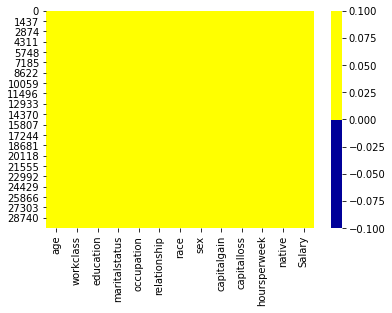

In [ ]:
import seaborn as sns
cols = sal_train.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(sal_train[cols].isnull(),
            cmap=sns.color_palette(colours))

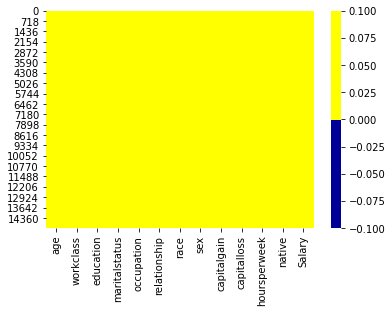

In [ ]:
import seaborn as sns
cols = sal_test.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(sal_test[cols].isnull(),
            cmap=sns.color_palette(colours))

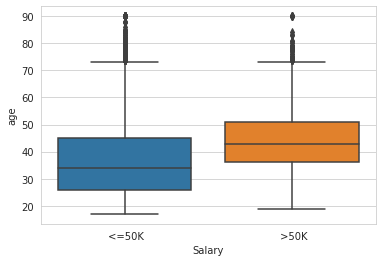

In [ ]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
  
sns.boxplot(x =sal_train['Salary'], y = sal_train['age'], data =sal_train)
		


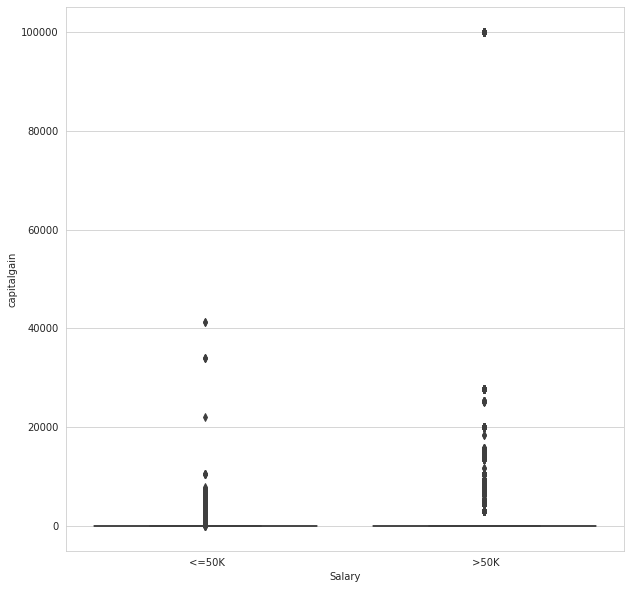

In [ ]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.rcParams['figure.figsize']=(10,10)
sns.boxplot(x =sal_train['Salary'], y = sal_train['capitalgain'], data =sal_train)


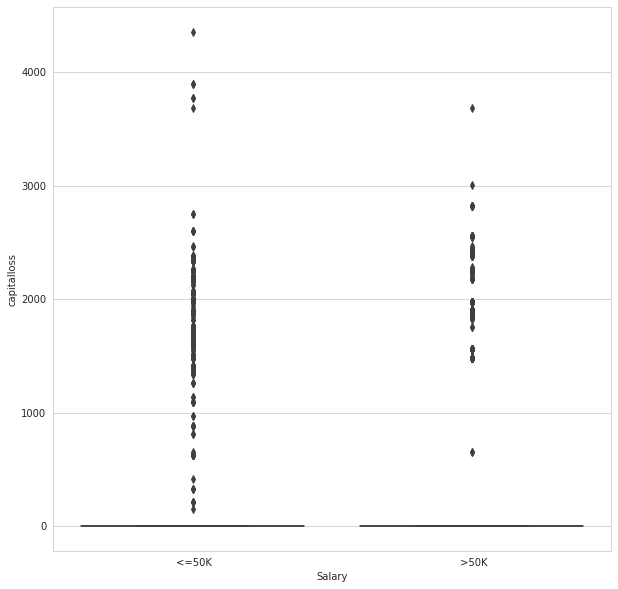

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x =sal_train['Salary'], y = sal_train['capitalloss'], data =sal_train)


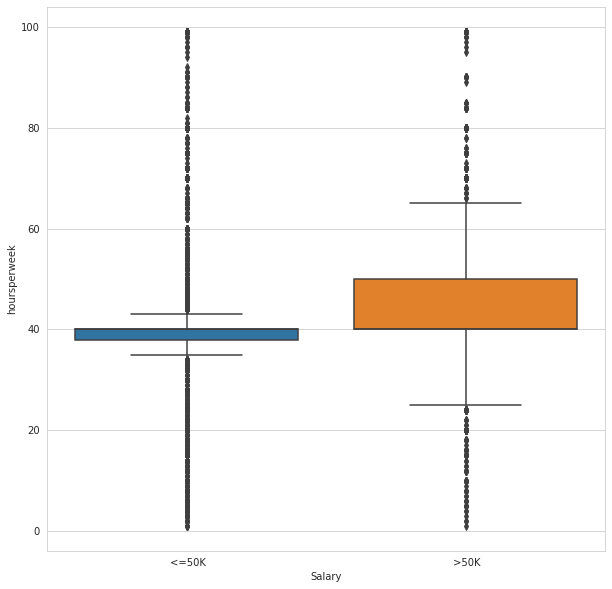

In [ ]:
sns.boxplot(x =sal_train['Salary'], y = sal_train['hoursperweek'], data =sal_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
sal_test["workclass"] = labelencoder.fit_transform(sal_test["workclass"])
sal_train["workclass"] = labelencoder.fit_transform(sal_train["workclass"])

In [ ]:
sal_test["education"] = labelencoder.fit_transform(sal_test["education"])
sal_train["education"] = labelencoder.fit_transform(sal_train["education"])
sal_test["maritalstatus"] = labelencoder.fit_transform(sal_test["maritalstatus"])
sal_train["maritalstatus"] = labelencoder.fit_transform(sal_train["maritalstatus"])
sal_test["occupation"] = labelencoder.fit_transform(sal_test["occupation"])
sal_train["occupation"] = labelencoder.fit_transform(sal_train["occupation"])
sal_test["relationship"] = labelencoder.fit_transform(sal_test["relationship"])
sal_train["relationship"] = labelencoder.fit_transform(sal_train["relationship"])
sal_test["race"] = labelencoder.fit_transform(sal_test["race"])
sal_train["race"] = labelencoder.fit_transform(sal_train["race"])
sal_test["sex"] = labelencoder.fit_transform(sal_test["sex"])
sal_train["sex"] = labelencoder.fit_transform(sal_train["sex"])
sal_test["native"] = labelencoder.fit_transform(sal_test["native"])
sal_train["native"] = labelencoder.fit_transform(sal_train["native"])
sal_test["Salary"] = labelencoder.fit_transform(sal_test["Salary"])
sal_train["Salary"] = labelencoder.fit_transform(sal_train["Salary"])


In [ ]:
sal_train

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,2,3,0,4,1,0,0,13,37,0
2,38,2,11,0,5,1,4,1,0,0,40,37,0
3,53,2,1,2,5,0,2,1,0,0,40,37,0
4,28,2,9,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,4,0,3,4,1,0,0,20,37,0


In [ ]:
xtest=sal_test.iloc[:,0:12]
xtrain=sal_train.iloc[:,0:12]
ytest=sal_test.iloc[:,-1]
ytrain=sal_train.iloc[:,-1]


In [ ]:
X_train=xtrain.head(5000)
Y_train=ytrain.head(5000)

### Grid Search CV

In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5],'C':[15,11,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,Y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [15, 11, 0.001], 'gamma': [50, 5],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gsv.best_params_ , gsv.best_score_ 

({'C': 0.001, 'gamma': 50, 'kernel': 'rbf'}, 0.75)

In [ ]:
clf = SVC(C= 0.001, gamma = 50)
clf.fit(X_train , Y_train)
y_pred = clf.predict(xtest.head(50))
acc = accuracy_score(ytest.head(50), y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(ytest.head(50), y_pred)

Accuracy = 72.0


array([[36,  0],
       [14,  0]])